In [ ]:
freed_prisoners([1, 1, 0, 0, 0, 1, 0]) ➞ 4
freed_prisoners([1, 1, 1]) ➞ 1
freed_prisoners([0, 0, 0]) ➞ 0
freed_prisoners([0, 1, 1, 1]) ➞ 1  #####

In [67]:
def prisoners(a_list, count=0):
    if sum(a_list)==0:
        return count
    else:
        for i, x in enumerate(a_list):
            if x==1:
                count += 1
                new_list = [ int(not bool(j)) for j in a_list[(i + 1): ]]
                return prisoners(new_list, count=count)

In [73]:
prisoners([0, 1, 1, 1])

1

**Lego_small** data [source](https://www.kaggle.com/joosthazelzet/lego-brick-images) 

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
p = Path()  #.cwd()
q = p /  'Lego_small' # use p to create a path to the Lego data 

target_dict = {"brick 1x2": 0, 
               "brick 2x2": 1, 
               "brick 2x4": 2, 
               "plate 1x2": 3, 
               "plate 2x2": 4, 
               "plate 2x4": 5} # create dictionary mapping Lego block type to integer label 

images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label   
    for img in fldr.iterdir():
        img = load_img(img, color_mode='grayscale') # load a grayscale image  
        img_array = img_to_array(img) # convert the image to an NumPy array 
        img_array_resized = smart_resize(img_array, [128, 128]) # resize the image to 128 by 128 
        img_array_reshaped = img_array_resized.reshape(128, 128) # reshape the image from (128, 128, 1) to (128, 128)
        images.append(img_array_reshaped) # add reshaped image to list of images 
        labels.append(current_label) # add label for this image to the list of labels 

images = np.array(images) # convert the list of images to a NumPy array 
labels = np.array(labels) # convert the list of labels to a NumPy array

In [6]:
labels

array(['brick 1x2', 'brick 1x2', 'brick 1x2', 'brick 1x2', 'brick 1x2',
       'brick 1x2', 'brick 1x2', 'brick 1x2', 'brick 2x2', 'brick 2x2',
       'brick 2x2', 'brick 2x2', 'brick 2x2', 'brick 2x2', 'brick 2x2',
       'brick 2x2', 'brick 2x4', 'brick 2x4', 'brick 2x4', 'brick 2x4',
       'brick 2x4', 'brick 2x4', 'brick 2x4', 'brick 2x4', 'plate 1x2',
       'plate 1x2', 'plate 1x2', 'plate 1x2', 'plate 1x2', 'plate 1x2',
       'plate 1x2', 'plate 1x2', 'plate 2x2', 'plate 2x2', 'plate 2x2',
       'plate 2x2', 'plate 2x2', 'plate 2x2', 'plate 2x2', 'plate 2x2',
       'plate 2x4', 'plate 2x4', 'plate 2x4', 'plate 2x4', 'plate 2x4',
       'plate 2x4', 'plate 2x4', 'plate 2x4'], dtype='<U9')

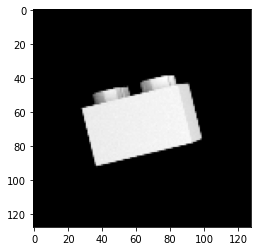

In [5]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(images[10], cmap='gray')

In [10]:
labels_int = np.array([target_dict[k] for k in labels]) # use the target_dict to convert the string labels to an array of integers